In [ ]:
# import the necessary packages
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
class ConvAutoencoder:
	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
		# initialize the input shape to be "channels last" along with
		# the channels dimension itself
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1

In [ ]:
# define the input to the encoder
inputs = Input(shape=inputShape)
x = inputs
# loop over the number of filters
for f in filters:
  # apply a CONV => RELU => BN operation
  x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
  x = LeakyReLU(alpha=0.2)(x)
  x = BatchNormalization(axis=chanDim)(x)
# flatten the network and then construct our latent vector
volumeSize = K.int_shape(x)
x = Flatten()(x)
latent = Dense(latentDim)(x)
# build the encoder model
encoder = Model(inputs, latent, name="encoder")

NameError: ignored

In [ ]:
#KERAS DOCUMENTATION 
#Let's build the simplest possible autoencoder
#We'll start simple, with a single fully-connected neural layer as encoder and as decoder:

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 13s 10ms/step - loss: 0.3813 - val_loss: 0.1895
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1795 - val_loss: 0.1533
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1489 - val_loss: 0.1332
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1310 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1200 - val_loss: 0.1126
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1122 - val_loss: 0.1067
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1068 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1028 - val_loss: 0.0990
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0998 - val_loss: 0.0966
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0976 - val_loss: 0.09

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

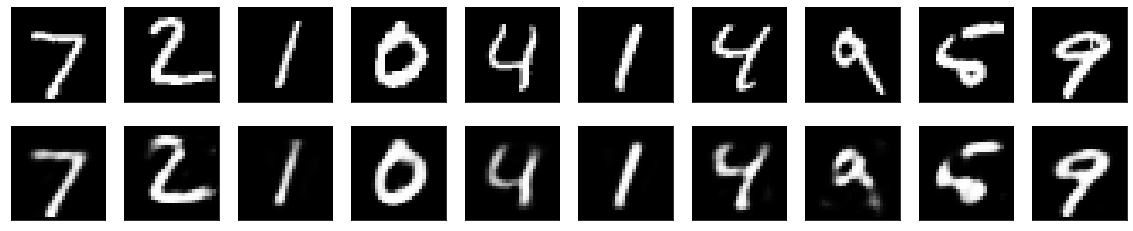

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Convolutional autoencoder

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
!tensorboard --logdir=/tmp/autoencoder

2021-06-02 18:25:49.274285: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.5.0 at http://localhost:6006/ (Press CTRL+C to quit)
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/manager.py", line 275, in remove_info_file
    os.unlink(_get_info_file_path())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/manager.py", line 248, in _get_info_file_path
    return os.path.join(_get_info_dir(), "pid-%d.info" % os.getpid())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/manager.py", line 231, in _get_info_dir
    os.makedirs(path)


In [ ]:
#in keras document run 50 epochs but i run 20 epochs

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 73s 152ms/step - loss: 0.3196 - val_loss: 0.1463
Epoch 2/50
469/469 [==============================] - 71s 152ms/step - loss: 0.1415 - val_loss: 0.1278
Epoch 3/50
469/469 [==============================] - 71s 152ms/step - loss: 0.1264 - val_loss: 0.1198
Epoch 4/50
469/469 [==============================] - 71s 151ms/step - loss: 0.1193 - val_loss: 0.1143
Epoch 5/50
469/469 [==============================] - 71s 151ms/step - loss: 0.1145 - val_loss: 0.1106
Epoch 6/50
469/469 [==============================] - 71s 151ms/step - loss: 0.1110 - val_loss: 0.1083
Epoch 7/50
469/469 [==============================] - 71s 152ms/step - loss: 0.1088 - val_loss: 0.1061
Epoch 8/50
469/469 [==============================] - 71s 152ms/step - loss: 0.1067 - val_loss: 0.1052
Epoch 9/50
469/469 [==============================] - 71s 152ms/step - loss: 0.1055 - val_loss: 0.1031
Epoch 10/50
469/469 [==============================] - 71s 152ms/step - l

KeyboardInterrupt: ignored

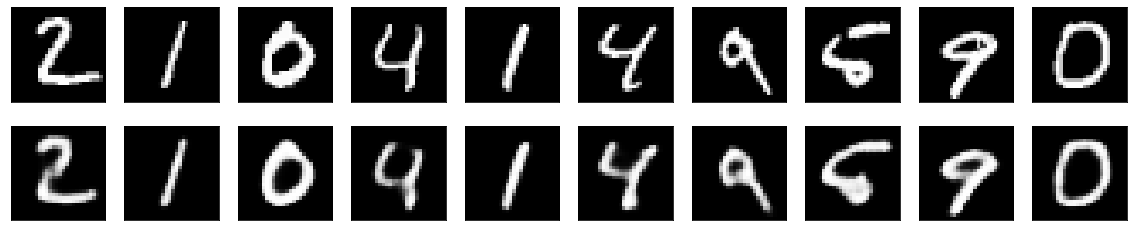

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

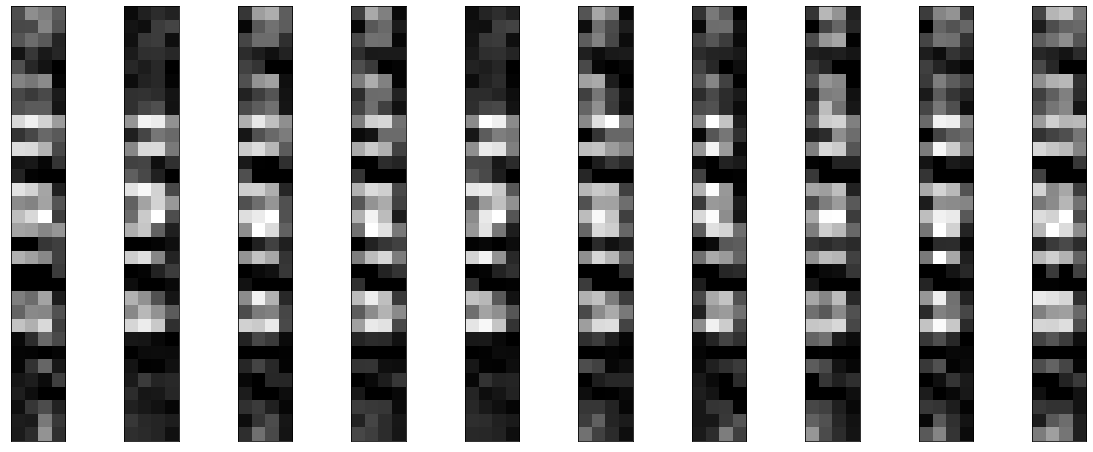

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Application to image denoising

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

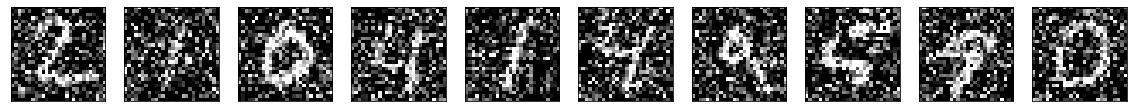

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#in keras document run 100 epochs but i run 10 epochs

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/10
469/469 [==============================] - 133s 281ms/step - loss: 0.2576 - val_loss: 0.1173
Epoch 2/10
469/469 [==============================] - 132s 282ms/step - loss: 0.1164 - val_loss: 0.1100
Epoch 3/10
469/469 [==============================] - 133s 283ms/step - loss: 0.1097 - val_loss: 0.1056
Epoch 4/10
469/469 [==============================] - 133s 283ms/step - loss: 0.1063 - val_loss: 0.1032
Epoch 5/10
469/469 [==============================] - 132s 282ms/step - loss: 0.1040 - val_loss: 0.1015
Epoch 6/10
469/469 [==============================] - 131s 280ms/step - loss: 0.1023 - val_loss: 0.1001
Epoch 7/10
469/469 [==============================] - 131s 279ms/step - loss: 0.1009 - val_loss: 0.0992
Epoch 8/10
469/469 [==============================] - 132s 281ms/step - loss: 0.1000 - val_loss: 0.0984
Epoch 9/10
469/469 [==============================] - 130s 278ms/step - loss: 0.0993 - val_loss: 0.0978
Epoch 10/10
469/469 [==============================] - 130s 278m

In [ ]:
#Sequence-to-sequence autoencoder

In [ ]:
timesteps = ...  # Length of your sequences
input_dim = ... 
latent_dim = ...

inputs = keras.Input(shape=(timesteps, input_dim))
encoded = layers.LSTM(latent_dim)(inputs)

decoded = layers.RepeatVector(timesteps)(encoded)
decoded = layers.LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = keras.Model(inputs, decoded)
encoder = keras.Model(inputs, encoded)

In [ ]:
#Variational autoencoder (VAE)
#Variational autoencoders are a slightly more modern and interesting take on autoencoding.

In [ ]:
#First, here's our encoder network, mapping inputs to our latent distribution parameters
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [ ]:
#We can use these parameters to sample new similar points from the latent space
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [ ]:
#Finally, we can map these sampled latent points back to reconstructed inputs

# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')


In [ ]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
#We train our VAE on MNIST digits:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=1,
        batch_size=32,
        validation_data=(x_test, x_test))


1875/1875 [==============================] - 15s 3ms/step - loss: 219.6507 - val_loss: 168.5463


In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0],
            x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

TypeError: ignored

<Figure size 432x432 with 0 Axes>

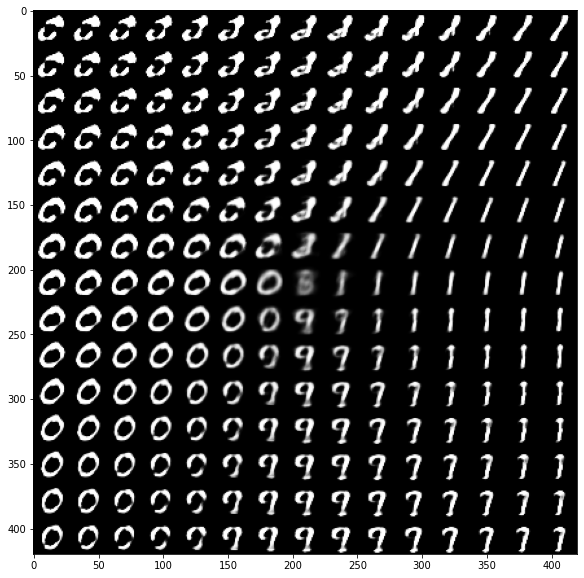

In [ ]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

In [ ]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1381
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0998
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0944
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0915
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0895


In [ ]:
#With the functional API we do this:
layer_1 = Dense(16, activation='relu')(input_img)
layer_2 = Dense(8, activation='relu')(layer_1)

In [ ]:
reconstructed = autoencoder.predict(x_test)
print(reconstructed)

[[4.50863930e-10 9.25386268e-10 5.69933198e-11 ... 7.91328253e-11
  4.79239391e-11 2.99663239e-10]
 [1.72211467e-10 4.26262442e-10 2.93175373e-09 ... 6.79666490e-10
  5.29801591e-10 1.11915810e-09]
 [1.78893833e-09 1.05659659e-09 5.68855830e-11 ... 7.75621900e-10
  4.54756455e-10 6.35707320e-10]
 ...
 [1.75891046e-09 1.29518918e-09 4.31218006e-10 ... 7.52939544e-10
  5.44832068e-10 2.34033209e-10]
 [1.06702658e-09 1.35375267e-09 7.05141723e-10 ... 1.17891705e-08
  4.75256334e-10 2.93403496e-10]
 [1.14348114e-11 1.08826568e-11 2.58235711e-10 ... 3.03409020e-10
  6.61115190e-11 2.90515424e-11]]


In [ ]:
autoencoder.fit(x_train, x_train)
#Denoising autoencoder is trained as:
autoencoder.fit(x_train_noisy, x_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0882


NameError: ignored